In [20]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler


from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer,
                             confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
import xgboost

%matplotlib inline
from sklearn.datasets import load_boston

from sklearn.base import clone
from sklearn import tree

In [21]:
boston = load_boston()
# Precios de casa
y = pd.DataFrame(boston.target, columns=["Target_price"])
# The other 13 features
X = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [22]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
#[KNeighborsRegressor,LinearRegression,Lasso,Ridge,ElasticNet,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor]

In [25]:
#KNN
knn = KNeighborsRegressor().fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)
y_hat_knn=(y_hat_knn).flatten()

In [26]:
#LinearR
lir = LinearRegression().fit(X_train, y_train)
y_hat_lir = lir.predict(X_test)
y_hat_lir=(y_hat_lir).flatten()

In [27]:
#Lasso
lasso = Lasso().fit(X_train, y_train)
y_hat_lasso = lasso.predict(X_test)
y_hat_lasso=(y_hat_lasso).flatten()

In [28]:
#Ridge
ridge = Ridge().fit(X_train, y_train)
y_hat_ridge = ridge.predict(X_test)
y_hat_ridge=(y_hat_ridge).flatten()

In [29]:
#ElasticNet
elasticNet = ElasticNet().fit(X_train, y_train)
y_hat_ElasticNet = elasticNet.predict(X_test)
y_hat_ElasticNet=(y_hat_ElasticNet).flatten()

In [30]:
#LogisticRegression
logisticRegression = LogisticRegression().fit(X_train, y_train)
y_hat_LogisticRegression = ogisticRegression.predict(X_test)
y_hat_LogisticRegression=(y_hat_LogisticRegression).flatten()

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [31]:
#DecissionTree
decisionTreeRegressor = DecisionTreeRegressor().fit(X_train, y_train)
y_hat_DecisionTreeRegressor = decisionTreeRegressor.predict(X_test)
y_hat_DecisionTreeRegressor=(y_hat_DecisionTreeRegressor).flatten()

In [37]:
#RandomForest
randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)
y_hat_RandomForestRegressor = randomForestRegressor.predict(X_test)

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_28976\3144986004.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)


In [36]:
#XGBoost
xGBRegressor = XGBRegressor().fit(X_train, y_train)
y_hat_XGBRegressor = xGBRegressor.predict(X_test)

In [50]:
df_hats = pd.DataFrame(data=[y_hat_knn,y_hat_lir, y_hat_lasso, y_hat_ridge, y_hat_ElasticNet, y_hat_DecisionTreeRegressor, y_hat_RandomForestRegressor,y_hat_XGBRegressor])

In [51]:
df_hats=df_hats.T

In [53]:
df_hats.columns=['y_hat_knn','y_hat_lir', 'y_hat_lasso', 'y_hat_ridge', 'y_hat_ElasticNet', 'y_hat_DecisionTreeRegressor', 'y_hat_RandomForestRegressor','y_hat_XGBRegressor']

In [54]:
df_hats.head(3)

,y_hat_knn,y_hat_lir,y_hat_lasso,y_hat_ridge,y_hat_ElasticNet,y_hat_DecisionTreeRegressor,y_hat_RandomForestRegressor,y_hat_XGBRegressor
0,30.46,32.655032,30.798187,32.511398,31.348467,29.9,29.985,30.359884
1,30.70,28.093495,28.618170,28.265232,28.679029,29.0,27.218,27.026636
2,21.72,18.029018,17.964730,17.528444,17.886279,22.5,19.782,19.176161


In [58]:
df_results = []
for i in df_hats.columns:
    r2 = r2_score(y_test,df_hats[i])
    df_results.append(r2)
print(df_results)

[0.5401612153026705, 0.7634174432138463, 0.6399927356461494, 0.7655800611077146, 0.6662534357446656, 0.6735821943462836, 0.9091177730802921, 0.9085331557145866]


In [59]:
df_results = pd.DataFrame(data=df_results)
df_results = df_results.T
df_results.columns = ['y_hat_knn','y_hat_lir', 'y_hat_lasso', 'y_hat_ridge', 'y_hat_ElasticNet', 'y_hat_DecisionTreeRegressor', 'y_hat_RandomForestRegressor','y_hat_XGBRegressor']
df_results.head(3)

,y_hat_knn,y_hat_lir,y_hat_lasso,y_hat_ridge,y_hat_ElasticNet,y_hat_DecisionTreeRegressor,y_hat_RandomForestRegressor,y_hat_XGBRegressor
0,0.540161,0.763417,0.639993,0.76558,0.666253,0.673582,0.909118,0.908533


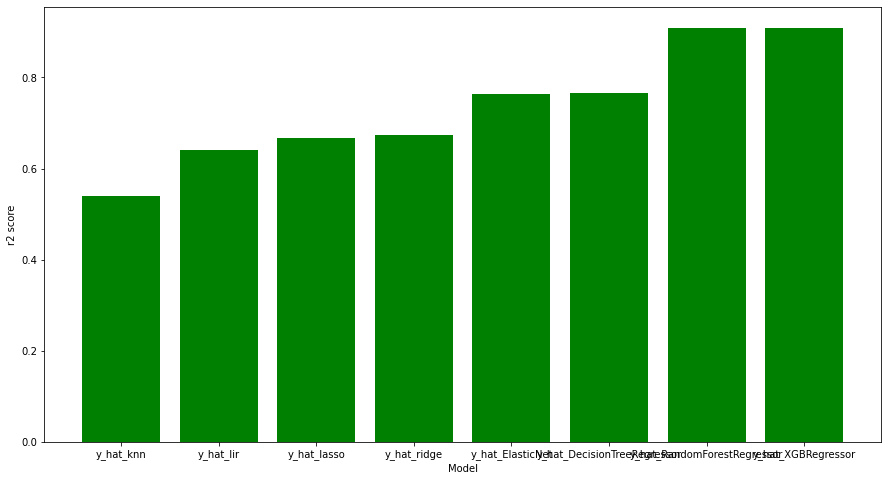

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(df_results.columns, sorted(df_results.T[0]), color="green")
plt.ylabel("r2 score")
plt.xlabel("Model")
plt.show()

In [68]:
def gs_best(params, model, model_name):
    model2 = model()
    gs = GridSearchCV(model2, params, cv=5, n_jobs=-1, verbose=1)    
    gs.fit(X_train, y_train)
    best = model(**gs.best_params_).fit(X_train, y_train)
    y_hat=best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    return model_name, r2

In [69]:
knn_params = {"n_neighbors":[3,5,7,9], "metric":["manhattan", "euclidean"], "weights":["uniform", "distance"]}

In [78]:
(model, r2_knn) = gs_best(knn_params, KNeighborsRegressor, "KNN")
r2_knn

Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.6508830800717474

In [73]:
models = [KNeighborsRegressor,
          LinearRegression,
          Lasso,
          Ridge,
          ElasticNet,
          DecisionTreeRegressor,
          RandomForestRegressor,
          XGBRegressor]
params = [{'n_neighbors': range(2,50), 'metric': ['manhattan', 'euclidean']},
          {},
          {'alpha': np.logspace(-5, 5)},
          {'alpha': np.logspace(-5, 5)},
          {'alpha': np.logspace(-5, 5)},
          {},
          {},
          {'max_depth':[3,6,10],'learning_rate':[0.01,0.05,0.1],'eta':np.logspace(-1,0,10)}
         ]
names = ["KNeighborsRegressor",
          "LinearRegression",
          "Lasso",
          "Ridge",
          "ElasticNet",
          "DecisionTreeRegressor",
          "RandomForestRegressor",
          "XGBRegressor"]

for model, param, name in zip(models, params, names):
    (model_result, r2_result) = gs_best(param, model, name)    
    print(name," ",r2_result)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
KNeighborsRegressor   0.630595778160548
Fitting 5 folds for each of 1 candidates, totalling 5 fits
LinearRegression   0.7634174432138463
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Lasso   0.7634183119192961
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Ridge   0.7638025839485867
Fitting 5 folds for each of 50 candidates, totalling 250 fits
ElasticNet   0.7638630128873183
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DecisionTreeRegressor   0.8107435034828239
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\jeramirez\AppData\Local\Temp\ipykernel_28976\1867684125.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best = model(**gs.best_params_).fit(X_train, y_train)


RandomForestRegressor   0.9113407191883728
Fitting 5 folds for each of 90 candidates, totalling 450 fits
XGBRegressor   0.9061454586921613


In [79]:
def gs_best1(params, model, model_name):
    model2 = model()
    gs = GridSearchCV(model2, params, cv=5, n_jobs=-1, verbose=1)    
    gs.fit(X_train, y_train)
    best = model(**gs.best_params_).fit(X_train, y_train)
    y_hat=best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    return best, r2

In [83]:
xgb_params = {'max_depth':[1],'learning_rate':[0.3,0.03]}
(model_xgb, r2_knn) = gs_best1(xgb_params, XGBRegressor, "XGBoost")
r2_knn

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.8532663386170671

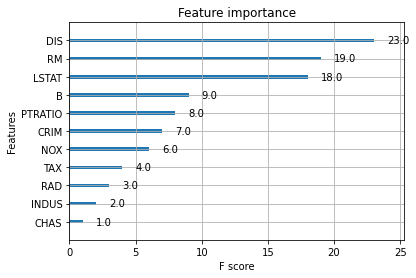

In [84]:
f_imp = xgboost.plot_importance(model_xgb)
#xgboost.plot_importance(model, ax=None, height=0.5, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight',show_values=True, color='pink', grid=False)
#xgboost.plot_importance(xgb, ax=None, height=0.5, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='gain',show_values=True, color='pink', grid=False)